<a href="https://colab.research.google.com/github/Prabhatha-Mayukha/Movie-box-office-prediction/blob/main/Movie_Box_Office_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
import math

In [4]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [5]:
train.shape

(3000, 23)

In [6]:
test.shape

(4398, 22)

In [7]:
train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [9]:
test.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."
2,3003,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0118556,en,Addicted to Love,Good-natured astronomer Sam is devastated when...,8.085194,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",5/23/97,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A Comedy About Lost Loves And Last Laughs,Addicted to Love,"[{'id': 931, 'name': 'jealousy'}, {'id': 9673,...","[{'cast_id': 11, 'character': 'Maggie', 'credi...","[{'credit_id': '52fe4330c3a36847f8041367', 'de..."
3,3004,NaN,6800000,"[{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...",http://www.sonyclassics.com/incendies/,tt1255953,fr,Incendies,A mother's last wishes send twins Jeanne and S...,8.596012,...,"[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",9/4/10,130.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,The search began at the opening of their mothe...,Incendies,"[{'id': 378, 'name': 'prison'}, {'id': 539, 'n...","[{'cast_id': 6, 'character': 'Nawal', 'credit_...","[{'credit_id': '56478092c3a36826140043af', 'de..."
4,3005,NaN,2000000,"[{'id': 36, 'name': 'History'}, {'id': 99, 'na...",NaN,tt0418753,en,Inside Deep Throat,"In 1972, a seemingly typical shoestring budget...",3.217680,...,"[{'iso_3166_1': 'US', 'name': 'United States o...",2/11/05,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was filmed in 6 days for 25 thousand dollar...,Inside Deep Throat,"[{'id': 279, 'name': 'usa'}, {'id': 1228, 'nam...","[{'cast_id': 1, 'character': 'Narrator (voice)...","[{'credit_id': '52fe44ce9251416c75041967', 'de..."


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  877 non-null    object 
 2   budget                 4398 non-null   int64  
 3   genres                 4382 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4140 non-null   object 
 12  production_countries   4296 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

In [11]:
train.nunique()

,0
id,3000
belongs_to_collection,422
budget,406
genres,872
homepage,941
imdb_id,3000
original_language,36
original_title,2975
overview,2992
popularity,2999


In [12]:
train.describe

<bound method NDFrame.describe of         id                              belongs_to_collection    budget  \
0        1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1        2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2        3                                                NaN   3300000   
3        4                                                NaN   1200000   
4        5                                                NaN         0   
...    ...                                                ...       ...   
2995  2996                                                NaN         0   
2996  2997                                                NaN         0   
2997  2998                                                NaN  65000000   
2998  2999                                                NaN  42000000   
2999  3000                                                NaN  35000000   

                                                 genres  \
0                        [{'id': 35, 'name': 'Comedy'}]   
1     [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                         [{'id': 18, 'name': 'Drama'}]   
3     [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4     [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
...                                                 ...   
2995  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2996  [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...   
2997  [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...   
2998  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
2999  [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...   

                               homepage    imdb_id original_language  \
0                                   NaN  tt2637294                en   
1                                   NaN  tt0368933                en   
2     http://sonyclassics.com/whiplash/  tt2582802                en   
3            http://kahaanithefilm.com/  tt1821480                hi   
4                                   NaN  tt1380152                ko   
...                                 ...        ...               ...   
2995                                NaN  tt0109403                en   
2996                                NaN  tt2364975                sv   
2997                                NaN  tt0116908                en   
2998     http://www.alongcamepolly.com/  tt0343135                en   
2999   http://www.abductionthefilm.com/  tt1600195                en   

                                original_title  \
0                       Hot Tub Time Machine 2   
1     The Princess Diaries 2: Royal Engagement   
2                                     Whiplash   
3                                      Kahaani   
4                                         마린보이   
...                                        ...   
2995                                   Chasers   
2996                               Vi är bäst!   
2997                   The Long Kiss Goodnight   
2998                          Along Came Polly   
2999                                 Abduction   

                                               overview  popularity  ...  \
0     When Lou, who has become the "father of the In...    6.575393  ...   
1     Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2     Under the direction of a ruthless instructor, ...   64.299990  ...   
3     Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4     Marine Boy is the story of a former national s...    1.148070  ...   
...                                                 ...         ...  ...   
2995  Military men Rock Reilly and Eddie Devane are ...    9.853270  ...   
2996  Three girls in 1980s Stockholm decide to form ...    3.727996  ...   
2997  Samantha Caine, suburban homemaker, is the ide...   14.482345  ...   
2998  Reuben Feffer is a guy who's spent his entire ...   15.725542  ...   
2999  A young man sets out to uncover the truth abou..

In [13]:
train['revenue'].describe()

,revenue
count,3.000000e+03
mean,6.672585e+07
std,1.375323e+08
min,1.000000e+00
25%,2.379808e+06
50%,1.680707e+07
75%,6.891920e+07
max,1.519558e+09


In [14]:
train['budget'].describe()

,budget
count,3.000000e+03
mean,2.253133e+07
std,3.702609e+07
min,0.000000e+00
25%,0.000000e+00
50%,8.000000e+06
75%,2.900000e+07
max,3.800000e+08


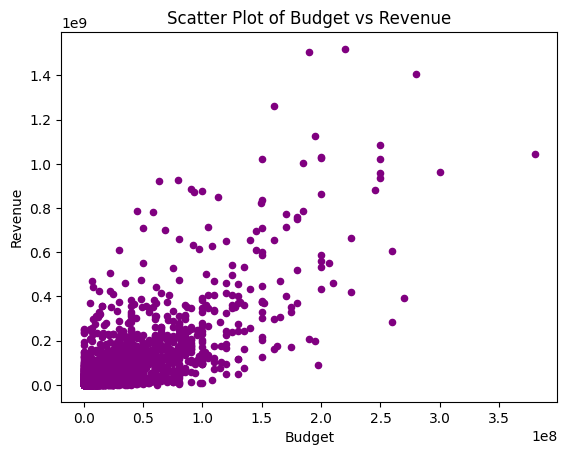

In [15]:
train.plot.scatter(x='budget', y='revenue', color='purple')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.title('Scatter Plot of Budget vs Revenue')
plt.show()

In [16]:
# top ten movies with the costliest budgets.
budget = train.sort_values(by='budget', ascending=False)
print((budget.loc[:, "budget"]).head(10))

2135    380000000
2209    300000000
2770    280000000
1425    270000000
1270    260000000
1630    260000000
2532    250000000
961     250000000
906     250000000
666     250000000
Name: budget, dtype: int64


In [17]:
# Top ten movies with the highet revenue
revenue = train.sort_values(by='revenue', ascending=False)
print("Top ten movies with the highet revenue\n")
print((revenue.loc[:,"revenue"]).head(10))

Top ten movies with the highet revenue

1126    1519557910
1761    1506249360
2770    1405403694
684     1262886337
2322    1123746996
906     1084939099
2135    1045713802
2562    1028570889
881     1025491110
734     1023784195
Name: revenue, dtype: int64


In [18]:
#removing features which are irrelevant for our prediction
train.drop(['imdb_id','poster_path'],axis=1,inplace=True)
test.drop(['imdb_id','poster_path'],axis=1,inplace=True)

In [19]:
#we have a lot of null values for homepage
#Converting homepage as binary
train['has_homepage'] = 0
train.loc[train['homepage'].isnull() == False, 'has_homepage'] = 1
test['has_homepage'] = 0
test.loc[test['homepage'].isnull() == False, 'has_homepage'] = 1

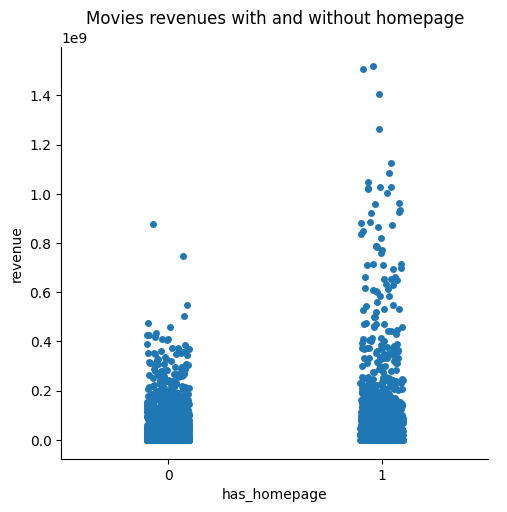

In [20]:
#Homepage v/s Revenue
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Movies revenues with and without homepage');

In [24]:
#Converting collections as binary
train['collection'] = 0
train.loc[train['belongs_to_collection'].isnull() == False, 'collection'] = 1
test['collection'] = 0
test.loc[test['belongs_to_collection'].isnull() == False, 'collection'] = 1

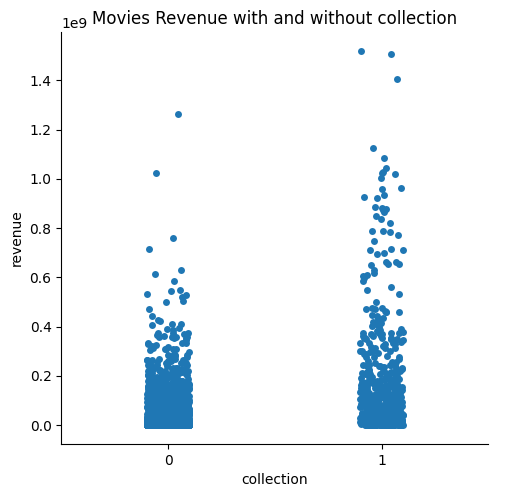

In [25]:
#collections v/s Revenue
sns.catplot(x='collection', y='revenue', data=train);
plt.title('Movies Revenue with and without collection');

In [26]:
#Collection too increaes the revenue
train=train.drop(['belongs_to_collection'],axis =1)
test=test.drop(['belongs_to_collection'],axis =1)

In [27]:
test.describe

<bound method NDFrame.describe of         id    budget                                             genres  \
0     3001         0  [{'id': 12, 'name': 'Adventure'}, {'id': 16, '...   
1     3002     88000  [{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...   
2     3003         0  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...   
3     3004   6800000  [{'id': 18, 'name': 'Drama'}, {'id': 10752, 'n...   
4     3005   2000000  [{'id': 36, 'name': 'History'}, {'id': 99, 'na...   
...    ...       ...                                                ...   
4393  7394  42000000                   [{'id': 53, 'name': 'Thriller'}]   
4394  7395  19000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
4395  7396  16000000                      [{'id': 18, 'name': 'Drama'}]   
4396  7397   2000000  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
4397  7398     64000                      [{'id': 18, 'name': 'Drama'}]   

     original_language                        original_title  \
0                   ja                    ディアルガVSパルキアVSダークライ   
1                   en           Attack of the 50 Foot Woman   
2                   en                      Addicted to Love   
3                   fr                             Incendies   
4                   en                    Inside Deep Throat   
...                ...                                   ...   
4393                en                          Original Sin   
4394                en                      Without a Paddle   
4395                en                           The Verdict   
4396                en                            It Follows   
4397                fr  Vivre sa vie: film en douze tableaux   

                                               overview  popularity  \
0     Ash and friends (this time accompanied by newc...    3.851534   
1     When an abused wife grows to giant size becaus...    3.559789   
2     Good-natured astronomer Sam is devastated when...    8.085194   
3     A mother's last wishes send twins Jeanne and S...    8.596012   
4     In 1972, a seemingly typical shoestring budget...    3.217680   
...                                                 ...         ...   
4393  A young man is plunged into a life of subterfu...    9.970359   
4394  Three friends, whose lives have been drifting ...    6.046516   
4395  Frank Galvin is a down-on-his luck lawyer, red...    9.596883   
4396  For 19-year-old Jay, fall should be about scho...   20.359336   
4397  Twelve episodic tales in the life of a Parisia...   11.305910   

                                   production_companies  \
0                                                   NaN   
1     [{'name': 'Woolner Brothers Pictures Inc.', 'i...   
2     [{'name': 'Warner Bros.', 'id': 6194}, {'name'...   
3     [{'name': 'TS Productions', 'id': 313}, {'name...   
4                                                   NaN   
...                                                 ...   
4393  [{'name': 'Intermedia Films', 'id': 763}, {'na...   
4394  [{'name': 'Paramount Pictures', 'id': 4}, {'na...   
4395  [{'name': 'Twentieth Century Fox Film Corporat...   
4396  [{'name': 'Northern Lights Films', 'id': 8714}...   
4397  [{'name': 'Pathé Consortium Cinéma', 'id': 220...   

                                   production_countries release_date  runtime  \
0     [{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...      7/14/07     90.0   
1     [{'iso_3166_1': 'US', 'name': 'United States o...      5/19/58     65.0   
2     [{'iso_3166_1': 'US', 'name': 'United States o...      5/23/97    100.0   
3     [{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...       9/4/10    130.0   
4     [{'iso_3166_1': 'US', 'name': 'United States o...      2/11/05     92.0   
...                                                 ...          ...      ...   
4393  [{'iso_3166_1': 'FR', 'name': 'France'}, {'iso...       8/3/01    118.0   
4394  [{'iso_3166_1': 'US', 'name': 'United States o...      8/20/04     95.0   
4395 

In [28]:
# top ten movies with the costliest budgets.
budget = test.sort_values(by='budget', ascending=False)
print((budget.loc[:, "budget"]).head(10))

1739    260000000
96      258000000
3691    255000000
1589    250000000
4183    250000000
1796    250000000
1906    250000000
3138    250000000
3867    250000000
1645    245000000
Name: budget, dtype: int64


<ipython-input-29-fa9360e328a6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=ax, x='revenue', y='original_language', data=train, showfliers=False, orient='h',palette="Set2")


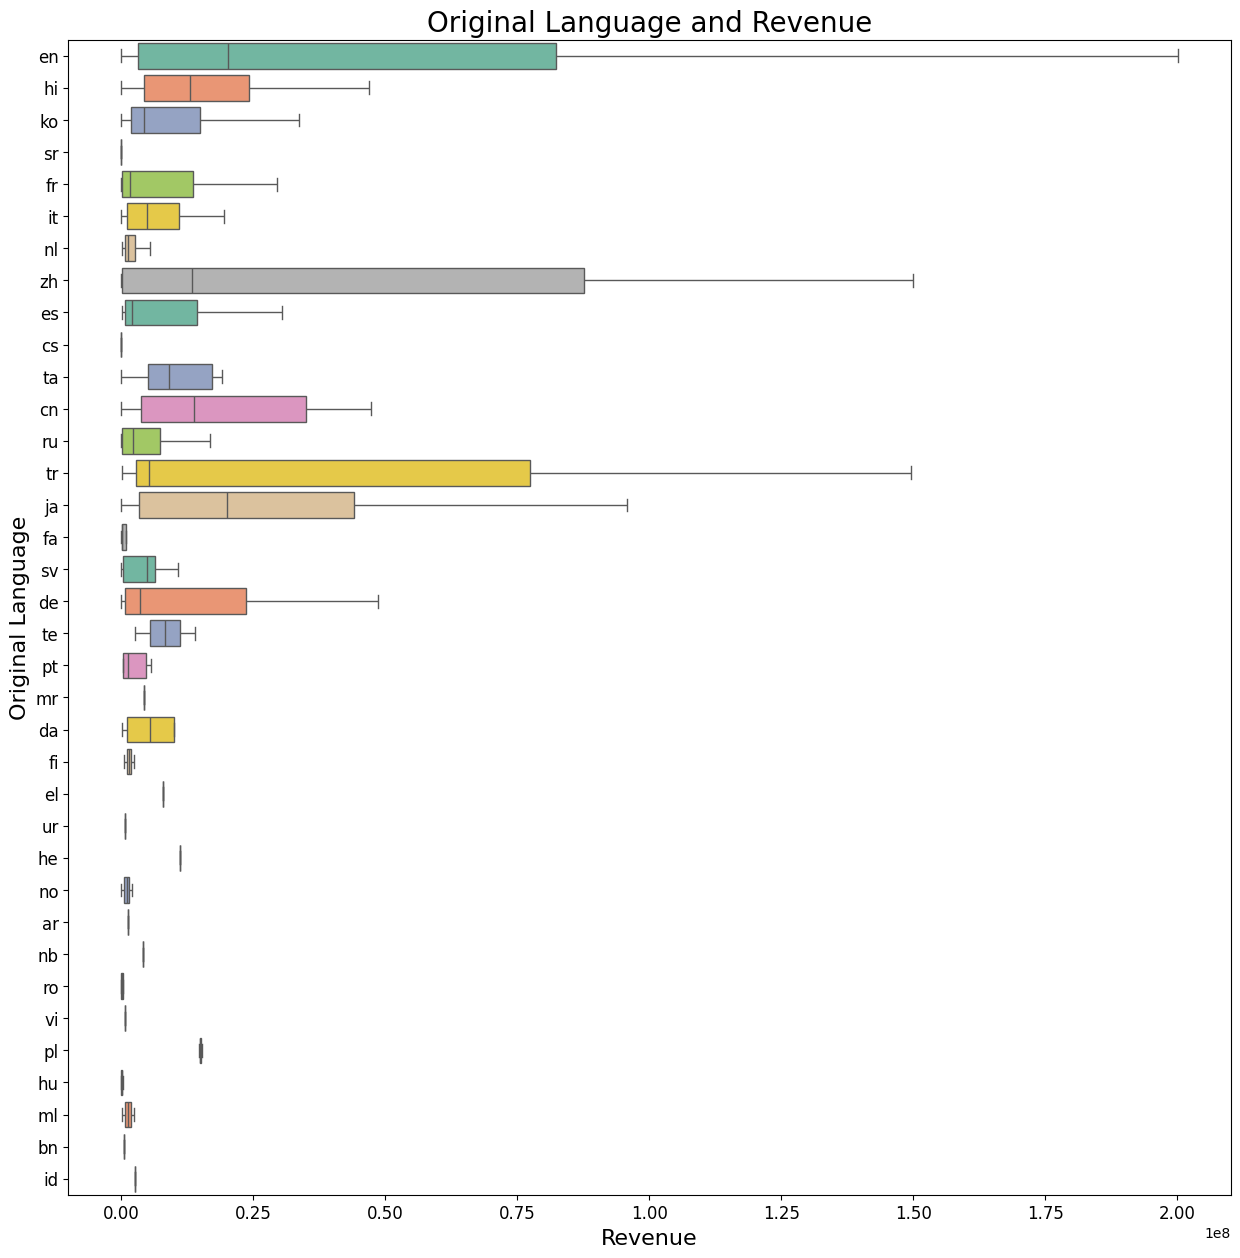

In [29]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Original Language and Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=16)
plt.ylabel('Original Language', fontsize=16)
sns.boxplot(ax=ax, x='revenue', y='original_language', data=train, showfliers=False, orient='h',palette="Set2")
plt.show()

Most popular languages

In [30]:
from wordcloud import WordCloud

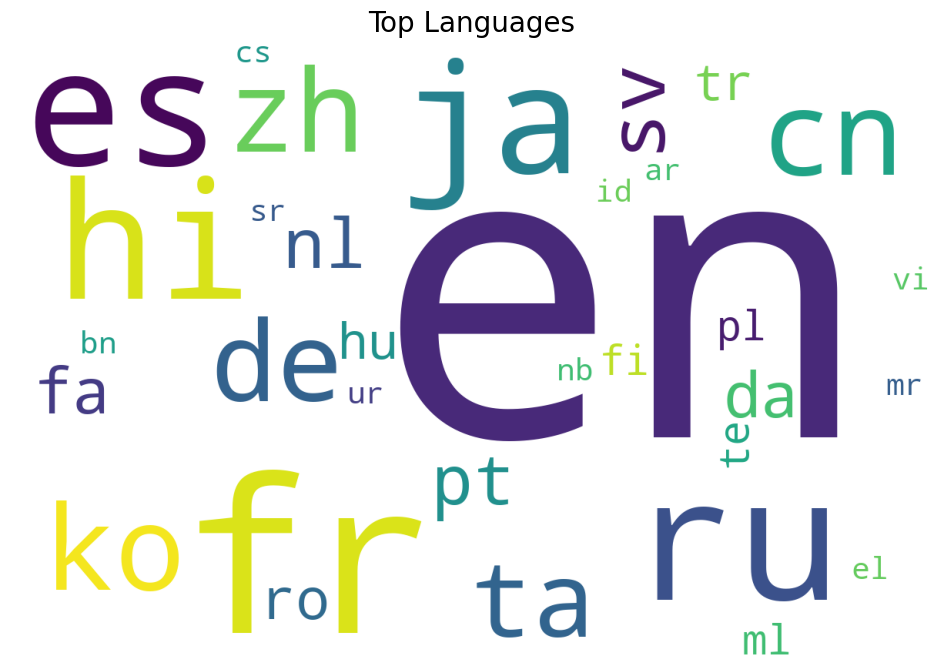

In [33]:
plt.figure(figsize = (12, 8))
text = ' '.join(train['original_language'])
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Languages', fontsize=20)
plt.axis("off")
plt.show()

Revenue based on Language

<ipython-input-32-1524d1f13dcd>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs


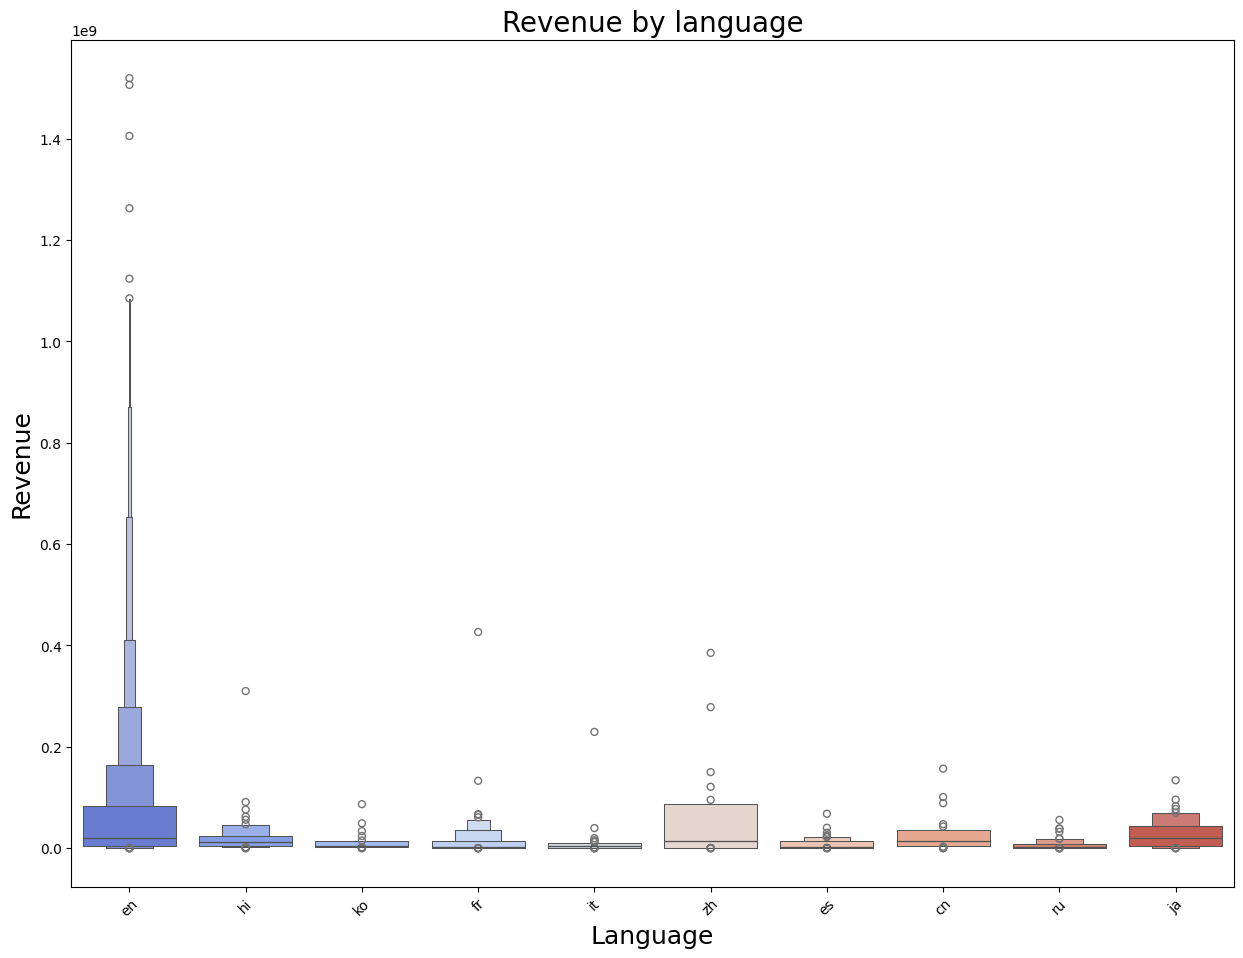

In [32]:
plt.figure(figsize=(15,11))

g1 = sns.boxenplot(
    x='original_language',
    y='revenue',
    data=train[train['original_language'].isin(
        train['original_language'].value_counts().head(10).index
    )],
    hue='original_language',  # Set x variable as hue
    palette="coolwarm",
    dodge=False  # Set dodge to False to avoid duplicate bars
)

g1.set_title("Revenue by language", fontsize=20) # title and fontsize
g1.set_xticklabels(g1.get_xticklabels(),rotation=45) # It's the way to rotate the xticks when we use variable to our graphs
g1.set_xlabel('Language', fontsize=18) # Xlabel
g1.set_ylabel('Revenue', fontsize=18) #Ylabel

plt.show()


Relationship between the genre and revenue of the movie

In [34]:
genres = []
repeated_revenues = []
for i in range(len(train)):
  if train['genres'][i] == train['genres'][i]:
      movie_genre = [genre['name'] for genre in eval(train['genres'][i])]
      genres.extend(movie_genre)
      repeated_revenues.extend([train['revenue'][i]]*len(movie_genre))

genre = pd.DataFrame(np.zeros((len(genres), 2)))
genre.columns = ['genre', 'revenue']
genre['genre'] = genres
genre['revenue'] = repeated_revenues

<ipython-input-35-ed25d947b10d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(ax=ax, x=repeated_revenues, y=genres, orient='h', palette='coolwarm', size=5, jitter=0.3)


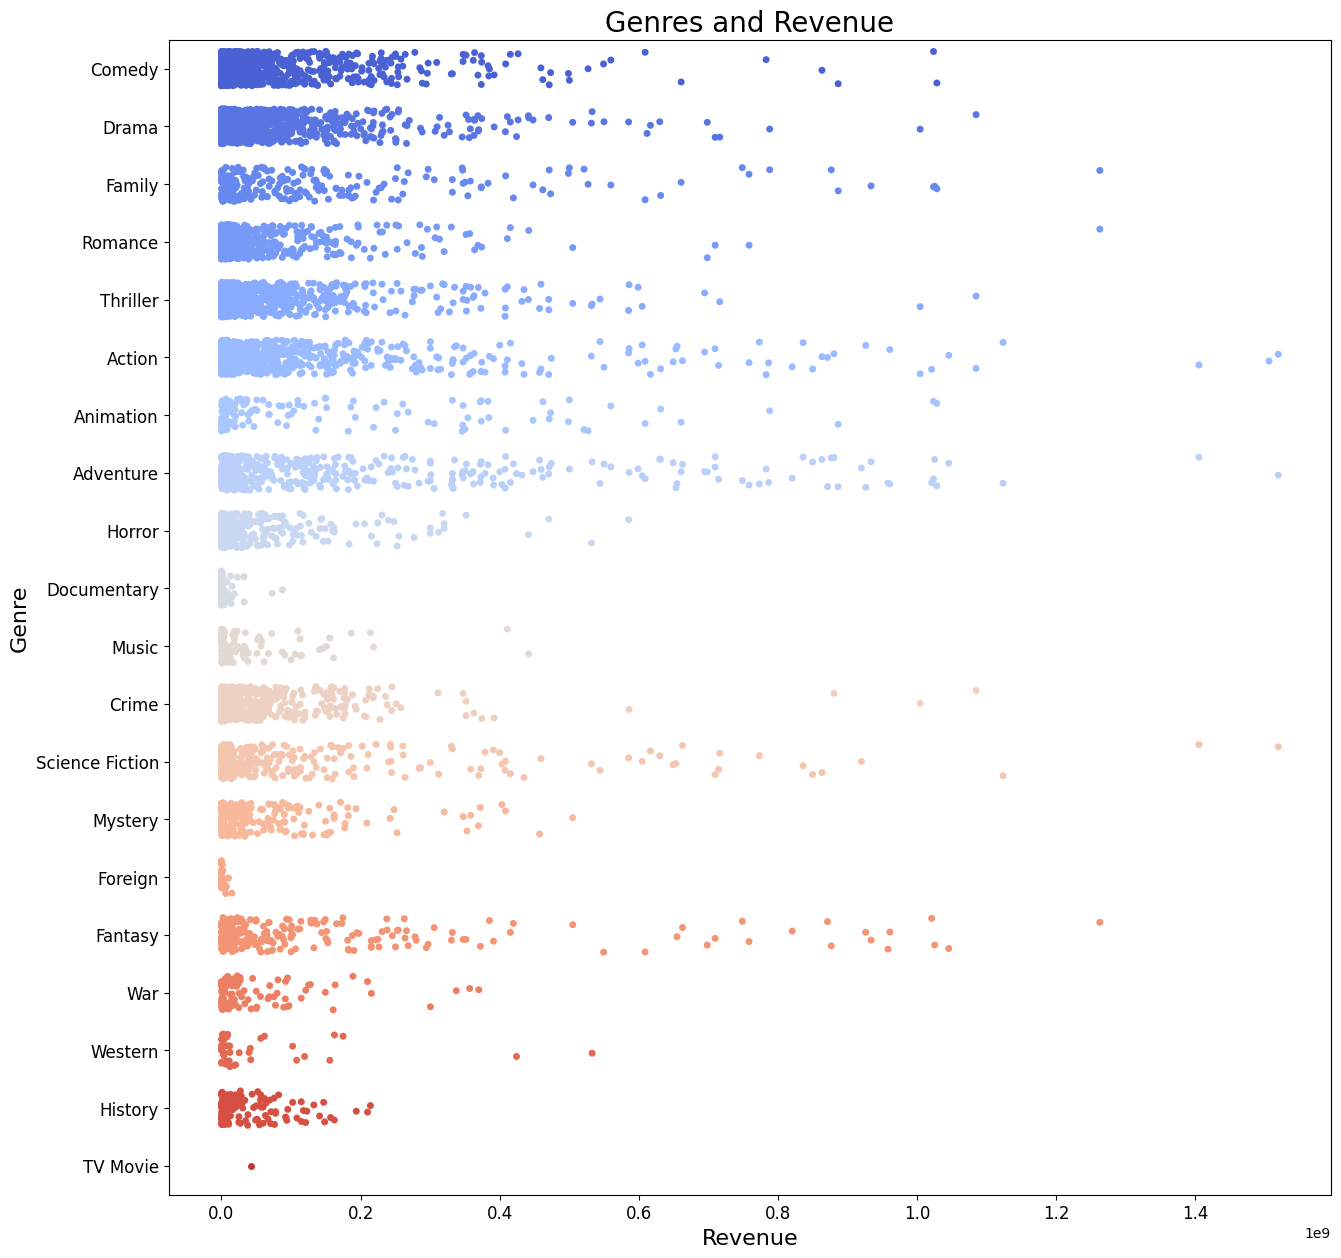

In [35]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Genres and Revenue', fontsize=20)
plt.xlabel('Revenue', fontsize=16)
plt.ylabel('Genre', fontsize=16)

# Increase jitter for strip plot
sns.stripplot(ax=ax, x=repeated_revenues, y=genres, orient='h', palette='coolwarm', size=5, jitter=0.3)

plt.show()

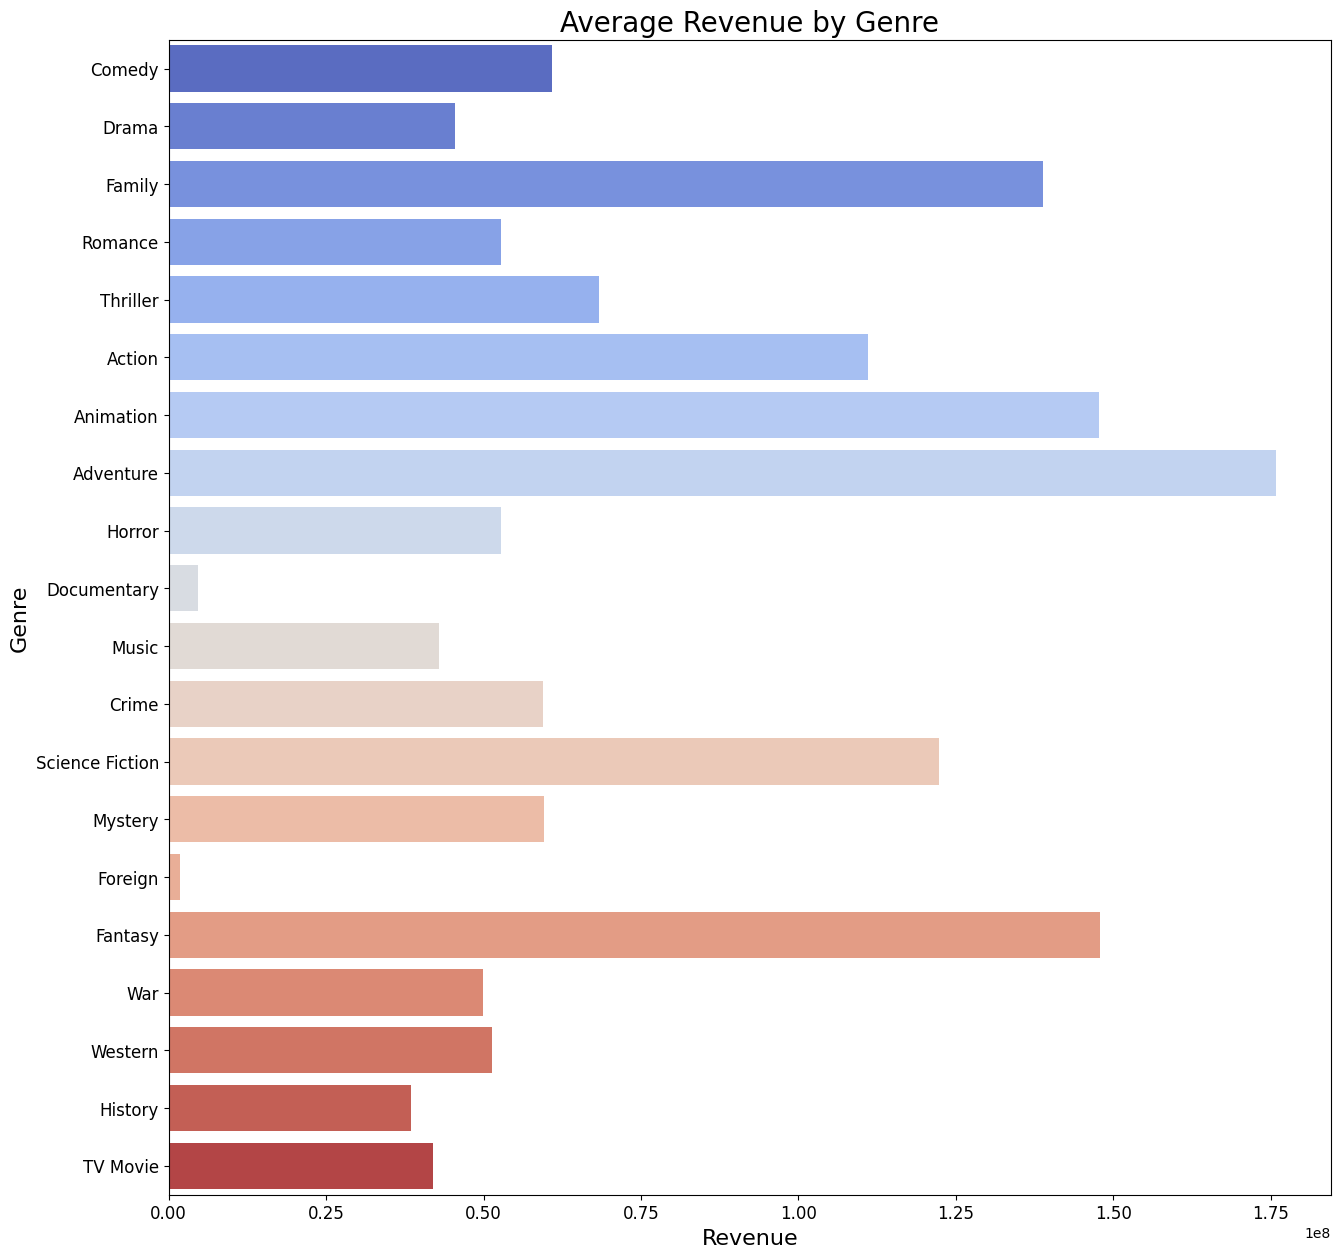

In [36]:
fig, ax = plt.subplots(figsize=(15, 15))
ax.tick_params(axis='both', labelsize=12)
plt.title('Average Revenue by Genre', fontsize=20)
plt.xlabel('Revenue', fontsize=16)
plt.ylabel('Genre', fontsize=16)

# Bar plot
sns.barplot(ax=ax, x=repeated_revenues, y=genres, estimator=np.mean,  errorbar=None, orient='h',hue=genres,palette='coolwarm')

plt.show()

Popular genres

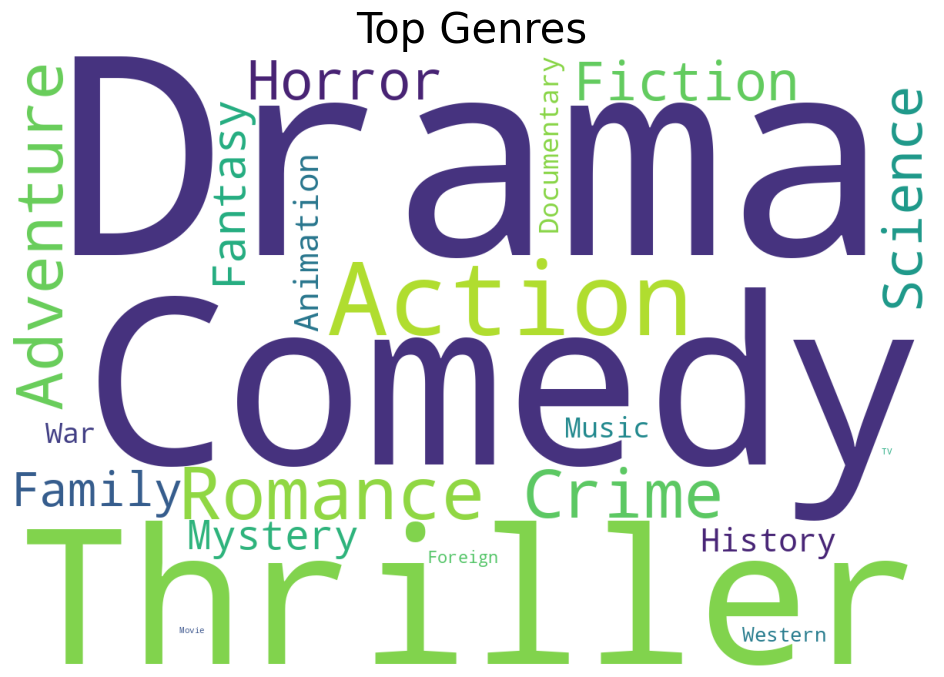

In [37]:
plt.figure(figsize = (12, 8))
text = ' '.join(genres)
wordcloud = WordCloud(max_font_size=None, background_color='white', collocations=False,
                      width=1200, height=800).generate(text)
plt.imshow(wordcloud)
plt.title('Top Genres', fontsize=30)
plt.axis("off")
plt.show()

In [38]:
train[['id','title','budget','revenue']].sort_values(['revenue'], ascending=False).head(10).style.background_gradient(subset='revenue', cmap='BuGn')

,id,title,budget,revenue
1126,1127,The Avengers,220000000,1519557910
1761,1762,Furious 7,190000000,1506249360
2770,2771,Avengers: Age of Ultron,280000000,1405403694
684,685,Beauty and the Beast,160000000,1262886337
2322,2323,Transformers: Dark of the Moon,195000000,1123746996
906,907,The Dark Knight Rises,250000000,1084939099
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2562,2563,Finding Dory,200000000,1028570889
881,882,Alice in Wonderland,200000000,1025491110
734,735,Zootopia,150000000,1023784195


In [39]:
train[['id','title','budget', 'revenue']].sort_values(['budget'], ascending=False).head(10).style.background_gradient(subset=['budget', 'revenue'], cmap='PuBu')

,id,title,budget,revenue
2135,2136,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802
2209,2210,Pirates of the Caribbean: At World's End,300000000,961000000
2770,2771,Avengers: Age of Ultron,280000000,1405403694
1425,1426,Superman Returns,270000000,391081192
1270,1271,John Carter,260000000,284139100
1630,1631,Transformers: The Last Knight,260000000,604942143
2532,2533,The Hobbit: An Unexpected Journey,250000000,1021103568
961,962,Harry Potter and the Half-Blood Prince,250000000,933959197
906,907,The Dark Knight Rises,250000000,1084939099
666,667,The Hobbit: The Desolation of Smaug,250000000,958400000


<Axes: >

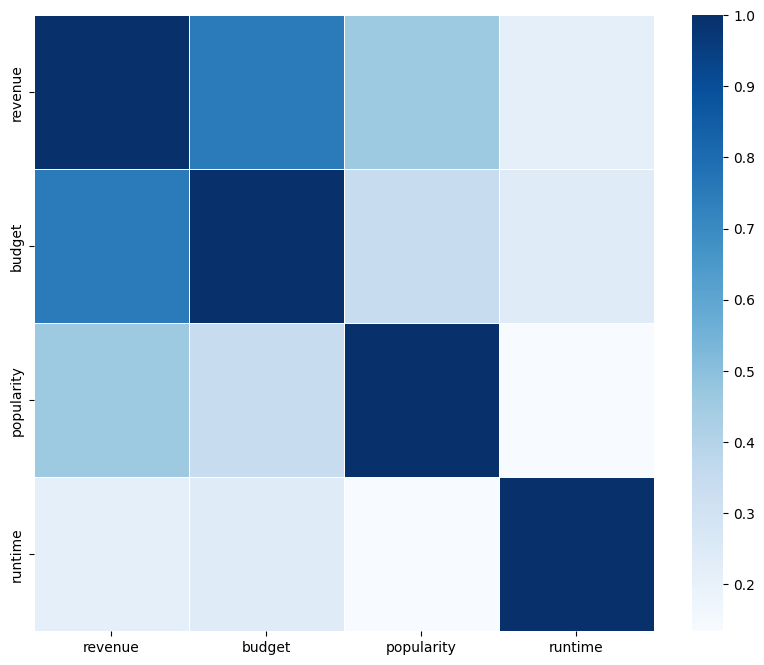

In [40]:
col = ['revenue','budget','popularity','runtime']

plt.subplots(figsize=(10, 8))

corr = train[col].corr()

sns.heatmap(corr, xticklabels=col,yticklabels=col, linewidths=.5, cmap="Blues")

<Axes: xlabel='budget', ylabel='revenue'>

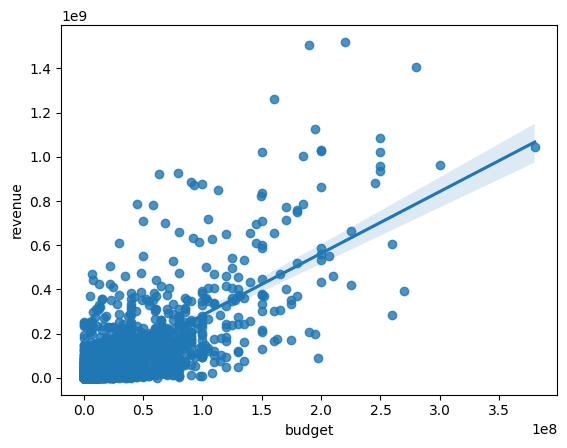

In [41]:
#budget and revenue are highly correlated
sns.regplot(x="budget", y="revenue", data = train)

In [42]:
#Adding a column to display how old a movie is
def get_age(df, col_name):
    #Creating a new column and storing the current date
    df['current_day'] = pd.to_datetime('today')
    #Age=Current date - release date(col_name)
    df[col_name+'-age']  = (df['current_day'] - pd.to_datetime(df[col_name])).dt.days
    #dropping current day column
    df.drop(['current_day'],axis=1, inplace=True)

In [43]:
#Extracting id numbers for genres
def get_genre_list (genres):
    res = []
    if not genres or pd.isnull(genres):
        return res
    genres = genres.replace('[','').replace(']','')
    genre_list = genres.split('},')

    for item in genre_list:
        res.append(int(item.split(',')[0].replace("{'id': ", '')))
    return res

In [44]:
#list of unique elements from a list of the given column in the dataframe
def get_unique(df,col_name):
    x = set()
    for j in df[col_name]:
        x = x.union(j)
    return list(x)

In [45]:
def n_hot_encode(df,col_name, val_list=None):
    #if val list is empty, we populate it with unique col_name items from col_name
    if(not val_list):
        val_list = get_unique(df, col_name)
    for i in range(len(val_list)):
        #creating column names eg: col_name_0,col_name_1....
        df[col_name+str(i)] = 0
    for index, row in df.iterrows():
        #in index variable, we are storing the id of the row
        for elm in df[col_name][index]:
            #elm signifies each element of col_name of that particular row(index)
            if( elm in val_list):
                #if the element is present in val_list, we make the column corresponding to that col_name item as 1
                df[col_name+str(val_list.index(elm))][index] = 1


In [46]:
def get_prod_id_list(prod):
    res = []
    if not prod or pd.isnull(prod):
        return res
    prod = prod.replace('[{', '').replace('}]', '')
    prod_list = prod.split('},')
    for item in prod_list:
        res.append(int(item.split(',')[-1].replace("'id': ", '')))
    return res


In [47]:
from collections import Counter

def get_counts(df, col_name):
    x = []
    for j in df[col_name]:
        x.append(j)

    return Counter(sum(x, []))

In [48]:
X = train[['budget', 'genres', 'original_language', 'popularity', 'production_companies', 'release_date', 'runtime']]
#target
y = train['revenue']

In [50]:
X.head()

,budget,genres,original_language,popularity,production_companies,runtime,release_date-age
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",93.0,3488
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",113.0,7338
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,3621
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,122.0,4566
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,118.0,5694


In [50]:
X.drop(['genre_list','genres'], axis=1, inplace=True)

In [51]:
X['prod_comp_list'] = X['production_companies'].apply(get_prod_id_list)

In [53]:
X.isna().sum().sort_values(ascending=False)

,0
production_companies,156
genres,7
runtime,2
budget,0
genre_list8,0
genre_list18,0
genre_list17,0
genre_list16,0
genre_list15,0
genre_list14,0


In [55]:
X.head()

,budget,genres,original_language,popularity,production_companies,runtime,release_date-age,genre_list,genre_list0,genre_list1,...,genre_list10,genre_list11,genre_list12,genre_list13,genre_list14,genre_list15,genre_list16,genre_list17,genre_list18,genre_list19
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",93.0,3488,[35],0,0,...,0,1,0,0,0,0,0,0,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",113.0,7338,"[35, 18, 10751, 10749]",0,0,...,0,1,0,0,0,0,0,0,1,1
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,3621,[18],0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,122.0,4566,"[53, 18]",0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,118.0,5694,"[28, 53]",0,0,...,0,0,0,0,0,0,0,1,0,0


In [57]:
X.isna().sum().sort_values(ascending=False)

,0
production_companies,156
genres,7
runtime,2
budget,0
genre_list8,0
genre_list18,0
genre_list17,0
genre_list16,0
genre_list15,0
genre_list14,0


In [58]:
X.head()

,budget,genres,original_language,popularity,production_companies,runtime,release_date-age,genre_list,genre_list0,genre_list1,...,genre_list10,genre_list11,genre_list12,genre_list13,genre_list14,genre_list15,genre_list16,genre_list17,genre_list18,genre_list19
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",93.0,3488,[35],0,0,...,0,1,0,0,0,0,0,0,0,0
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",113.0,7338,"[35, 18, 10751, 10749]",0,0,...,0,1,0,0,0,0,0,0,1,1
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",105.0,3621,[18],0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,122.0,4566,"[53, 18]",0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,118.0,5694,"[28, 53]",0,0,...,0,0,0,0,0,0,0,1,0,0


In [58]:
#X['original_language'] = X['original_language'].apply(get_language_position)

#one hot encoding the original_language column
X=pd.get_dummies(X,columns=['original_language'])

In [59]:
X.head()

,budget,popularity,runtime,release_date-age,genre_list0,genre_list1,genre_list2,genre_list3,genre_list4,genre_list5,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,14000000,6.575393,93.0,3488,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,40000000,8.248895,113.0,7338,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,3300000,64.299990,105.0,3621,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1200000,3.174936,122.0,4566,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,0,1.148070,118.0,5694,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [60]:
#displaying the number of null values for each column
X.isna().sum().sort_values(ascending=False)

,0
production_companies,156
genres,7
runtime,2
budget,0
genre_list8,0
genre_list18,0
genre_list17,0
genre_list16,0
genre_list15,0
genre_list14,0


In [61]:
#filling null values of 'runtime' column with the mean of values of the respective column
mean_value=X['runtime'].mean()
X['runtime'].fillna(value=mean_value, inplace=True)
#displaying the number of null values for each column
X.isna().sum().sort_values(ascending=False)

<ipython-input-61-801b3d6946f3>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['runtime'].fillna(value=mean_value, inplace=True)


,0
production_companies,156
genres,7
budget,0
genre_list7,0
genre_list18,0
genre_list17,0
genre_list16,0
genre_list15,0
genre_list14,0
genre_list13,0


In [63]:
X.head()

,budget,popularity,runtime,release_date-age,genre_list0,genre_list1,genre_list2,genre_list3,genre_list4,genre_list5,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
0,14000000,6.575393,93.0,3488,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
1,40000000,8.248895,113.0,7338,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2,3300000,64.299990,105.0,3621,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
3,1200000,3.174936,122.0,4566,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
4,0,1.148070,118.0,5694,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [64]:
X.describe

<bound method NDFrame.describe of         budget  popularity  runtime  release_date-age  genre_list0  \
0     14000000    6.575393     93.0              3488            0   
1     40000000    8.248895    113.0              7338            0   
2      3300000   64.299990    105.0              3621            0   
3      1200000    3.174936    122.0              4566            0   
4            0    1.148070    118.0              5694            0   
...        ...         ...      ...               ...          ...   
2995         0    9.853270    102.0             11097            0   
2996         0    3.727996    102.0              4182            0   
2997  65000000   14.482345    120.0             10194            0   
2998  42000000   15.725542     90.0              7541            0   
2999  35000000   10.512109    106.0              4735            0   

      genre_list1  genre_list2  genre_list3  genre_list4  genre_list5  ...  \
0               0            0            0            0            0  ...   
1               0            0            0            0            1  ...   
2               0            0            0            0            1  ...   
3               0            0            0            0            1  ...   
4               0            0            0            0            0  ...   
...           ...          ...          ...          ...          ...  ...   
2995            0            0            0            0            0  ...   
2996            0            0            0            0            1  ...   
2997            0            0            0            1            0  ...   
2998            0            0            0            0            0  ...   
2999            0            0            0            0            0  ...   

      original_language_ro  original_language_ru  original_language_sr  \
0                    False                 False                 False   
1                    False                 False                 False   
2                    False                 False                 False   
3                    False                 False                 False   
4                    False                 False                 False   
...                    ...                   ...                   ...   
2995                 False                 False                 False   
2996                 False                 False                 False   
2997                 False                 False                 False   
2998                 False                 False                 False   
2999                 False                 False                 False   

      original_language_sv  original_language_ta  original_language_te  \
0                    False                 False                 False   
1                    False                 False                 False   
2                    False                 False                 False   
3                    False                 False                 False   
4                    False                 False                 False   
...                    ...                   ...                   ...   
2995                 False                 False                 False   
2996                  True                 False                 False   
2997                 False                 False                 False   
2998                 False                 False                 False   
2999                 False                 False                 False   

      original_language_tr  original_language_ur  original_language_vi  \
0                    False                 False                 False   
1                    False                 False                 False   
2                    False                 False                 False   
3                    False                 False                 False   
4                    False              

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=80)

In [66]:
y_train

,revenue
2829,2033165
2063,6861102
622,4073489
905,92823546
1261,11879046
...,...
522,28883511
2259,1829917
2982,376597
1212,13269963


In [67]:
X_test

,budget,popularity,runtime,release_date-age,genre_list0,genre_list1,genre_list2,genre_list3,genre_list4,genre_list5,...,original_language_ro,original_language_ru,original_language_sr,original_language_sv,original_language_ta,original_language_te,original_language_tr,original_language_ur,original_language_vi,original_language_zh
1779,14600000,12.989627,101.0,11532,0,0,1,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2179,72000000,9.807552,131.0,8360,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
1831,6500000,0.877477,102.0,4981,0,0,0,0,0,0,...,False,True,False,False,False,False,False,False,False,False
315,55000000,11.672394,141.0,6066,0,0,0,0,1,1,...,False,False,False,False,False,False,False,False,False,False
1222,200000000,13.693002,106.0,4838,0,1,0,1,0,0,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,14000000,11.090265,112.0,6319,0,0,0,0,0,1,...,False,False,False,False,False,False,False,False,False,False
2052,40000000,5.361771,111.0,3342,0,0,1,0,0,0,...,False,False,False,False,False,False,False,False,False,True
1614,19000000,10.187278,93.0,9081,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,False,False
2581,15000000,13.310556,108.0,3665,0,0,0,0,1,0,...,False,False,False,False,False,False,False,False,False,False


In [68]:
y_test

,revenue
1779,70906973
2179,27642707
1831,9816332
315,113020255
1222,559852396
...,...
745,19777647
2052,385284817
1614,40846082
2581,32556119


In [69]:
X_train.isna().sum().sort_values(ascending=False)

,0
budget,0
popularity,0
original_language_hu,0
original_language_hi,0
original_language_he,0
...,...
prod_comp_list1,0
prod_comp_list0,0
genre_list19,0
genre_list18,0


In [70]:
X_test.isna().sum().sort_values(ascending=False)

,0
budget,0
popularity,0
original_language_hu,0
original_language_hi,0
original_language_he,0
...,...
prod_comp_list1,0
prod_comp_list0,0
genre_list19,0
genre_list18,0


In [71]:
y_train.isna().sum()

0

In [72]:
y_test.isna().sum()

0

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge,Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler

from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error


 # **Linear Regression**

In [74]:
regg=LinearRegression()
regg.fit(X_train, y_train)

LinearRegression()

In [75]:
pred=regg.predict(X_test)

In [76]:
r_squared_train = regg.score(X_train, y_train)

In [77]:
#printing r-squared error of linear regression model for train dataset
#Since it lies almost mid-way of 0-1, this model is not good for our project
print(r_squared_train)

0.627291473834962


In [78]:
mae=metrics.mean_absolute_error(y_test, pred)
mse=metrics.mean_squared_error(y_test, pred)
rmse=math.sqrt(mse)
print('MAE:',mae)
print('MSE:',mse)
print('RMSE:',rmse)

MAE: 47898451.04423948
MSE: 7683821923849244.0
RMSE: 87657412.2584579


Since all the following metrices have a very high value, linear regression model is not desirable for our project

#**Logistic Regression**

In [79]:
lg_regg=LogisticRegression()
lg_regg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [80]:
#printing r-squared error of logistic regression model for train dataset
lg_r_squared_train = lg_regg.score(X_train, y_train)
print(lg_r_squared_train)

0.0004761904761904762


Since it is almost equal to 0, this model is not at all good for our project

In [81]:
lg_pred=lg_regg.predict(X_test)

In [82]:
lg_mae=metrics.mean_absolute_error(y_test, lg_pred)
lg_mse=metrics.mean_squared_error(y_test, lg_pred)
lg_rmse=math.sqrt(mse)
print('MAE:',lg_mae)
print('MSE:',lg_mse)
print('RMSE:',lg_rmse)

MAE: 670543370.9266666
MSE: 6.37494307535961e+17
RMSE: 87657412.2584579


# **POLYNOMIAL REGRESSION WITH DEGREE=1**

In [83]:
poly = PolynomialFeatures(degree = 1)
X_poly = poly.fit_transform(X)
print(len(X_poly))
poly.fit(X_poly, y)

3000


PolynomialFeatures(degree=1)

In [84]:
poly_train = PolynomialFeatures(degree=1, include_bias=False).fit_transform(X_train)

In [85]:
model = Ridge()

model.fit(poly_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.82526e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Ridge()

In [86]:
print(f"Train R-Squared score: {model.score(poly_train, y_train)}")
poly_test = PolynomialFeatures(degree=1, include_bias=False).fit_transform(X_test)
print(f"Test R-Squared score: {model.score(poly_test, y_test)}")

Train R-Squared score: 0.6272405887352057
Test R-Squared score: 0.6416406856043098


# **POLYNOMIAL REGRESSION WITH DEGREE=2**

In [87]:
poly_train = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_train)
model = Ridge()

In [88]:
model.fit(poly_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Ridge()

In [89]:
print(f"Train R-Squared score: {model.score(poly_train, y_train)}")
poly_test = PolynomialFeatures(degree=2, include_bias=False).fit_transform(X_test)
print(f"Test R-Squared score: {model.score(poly_test, y_test)}")

Train R-Squared score: 0.6244093581611266
Test R-Squared score: 0.5176417346823892


In [90]:
poly_train = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_train)
model = Ridge()

model.fit(poly_train, y_train)

print(f"Train R-Squared score: {model.score(poly_train, y_train)}")
poly_test = PolynomialFeatures(degree=3, include_bias=False).fit_transform(X_test)
print(f"Test R-Squared score: {model.score(poly_test, y_test)}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


Train R-Squared score: 0.08492019775498083
Test R-Squared score: -1.6520659630279502


In [91]:
def algo_test(x,y):
        L=LinearRegression()
        R=Ridge()
        kn=KNeighborsRegressor()
        dt=DecisionTreeRegressor()
        Rf=RandomForestRegressor(n_estimators=100)
        xgb=XGBRegressor()

        algos=[L,R,kn,dt,Rf,xgb]
        algo_names=['Linear','Ridge','KNeighborsRegressor','Decision Tree','Random Forest','XGB Regressor']

        #x_train, x_test, y_train, y_test=train_test_split(X,y,test_size=.3,random_state=42)

        r_squared= []
        rmse= []
        mae= []

        result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)

        for algo in algos:
            p=algo.fit(X_train,y_train).predict(X_test)
            r_squared.append(r2_score(y_test,p))
            rmse.append(mean_squared_error(y_test,p)**.5)
            mae.append(mean_absolute_error(y_test,p))

        result.R_Squared=r_squared
        result.RMSE=rmse
        result.MAE=mae

        rtable=result.sort_values('R_Squared',ascending=False)
        return rtable

In [92]:
algo_test(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.82526e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,R_Squared,RMSE,MAE
Random Forest,0.685142,8.212748e+07,4.191561e+07
Ridge,0.641641,8.761737e+07,4.779780e+07
Linear,0.641313,8.765741e+07,4.789845e+07
XGB Regressor,0.596856,9.293111e+07,4.530070e+07
KNeighborsRegressor,0.502907,1.031929e+08,4.978607e+07
Decision Tree,0.302846,1.222067e+08,5.654901e+07


In [93]:
algo_test(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=3.82526e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


,R_Squared,RMSE,MAE
Random Forest,0.689839,8.151253e+07,4.155291e+07
Ridge,0.641641,8.761737e+07,4.779780e+07
Linear,0.641313,8.765741e+07,4.789845e+07
XGB Regressor,0.596856,9.293111e+07,4.530070e+07
KNeighborsRegressor,0.502907,1.031929e+08,4.978607e+07
Decision Tree,0.398666,1.134982e+08,5.493436e+07


# **Predicting using the Model which gave best results: Random Forest Regression**

In [94]:
Rf=RandomForestRegressor()
Rf.fit(X_train, y_train)
y_pred= Rf.predict(X_test)

In [95]:
y_pred

array([6.84127905e+07, 1.21418980e+08, 4.98951959e+06, 1.12378719e+08,
       8.01445543e+08, 8.48733550e+05, 1.69134100e+08, 4.23904675e+07,
       2.03155052e+07, 2.44260851e+07, 5.93435400e+07, 9.03835820e+06,
       1.49858527e+08, 5.99874501e+07, 1.01213264e+06, 3.65176867e+06,
       5.84589114e+07, 6.61989850e+05, 1.13197568e+08, 1.31754140e+08,
       6.58872326e+06, 1.75057854e+06, 2.84868847e+06, 1.14007529e+08,
       4.58798750e+05, 1.58608711e+07, 1.16747746e+08, 2.47003654e+07,
       5.42930152e+07, 8.53614940e+07, 9.21733094e+07, 7.42913450e+05,
       1.37429974e+08, 8.61228471e+06, 8.44232345e+06, 4.24454970e+05,
       2.83249685e+06, 9.48569738e+07, 3.97811795e+07, 3.35470557e+07,
       5.65573623e+07, 1.22489561e+07, 7.16378282e+07, 2.03523969e+07,
       1.78773745e+07, 3.83164144e+08, 9.31581810e+05, 3.16747274e+08,
       2.09470953e+07, 7.19082418e+07, 1.91842260e+07, 3.82206980e+07,
       7.21731120e+07, 1.04513025e+08, 3.53308511e+08, 3.42436123e+07,
      